# You know your Weather and Soil content data, so what crop can you plant?

### Data Processing

Crop reccomendation data was scraped from Kaggle by Raghav Gupta in RAGHAV GUPTA in 2021

In [10]:
import numpy as np # linear algebra
import pandas as pd # data analysing/ machine learning task
import matplotlib.pyplot as plt # two dimensional plotting with inline plotting
%matplotlib inline

import seaborn as sns #statistical graphic

# Seaborn is an amazing visualization library for statistical graphics plotting in Python. 
# It provides beautiful default styles and color palettes to make statistical plots more attractive. 
# It is built on the top of matplotlib library and also closely integrated to the data structures from pandas.
 

In [12]:
# Upload data to the note
# Checking the first five data to see if we uploaded the right data

df_crop = pd.read_csv('/Users/wihartiop/Downloads/Crop_recommendation.csv')
df_crop.head()


,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [13]:
# Checking the shape of the data and the headings

print(df_crop.shape)
df_crop.columns

(2200, 8)


Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [14]:
# Changing the column title with .rename()

df_crop.rename(columns = {'N': 'N(mg/kg)', 'P': 'P(mg/kg)','K': 'K(mg/kg)','temperature':'Temperature(°C)', 'humidity':'Humidity(%)','ph' : 'pH','rainfall':'Rainfall(mm)','label':'Crop'}, inplace =True)

In [15]:
# Checking any Null or missing value, "false" means no missing value

df_crop.isna().values.any()

False

In [16]:
# Showing the distribution of the data

df_crop.describe()

,N(mg/kg),P(mg/kg),K(mg/kg),Temperature(°C),Humidity(%),pH,Rainfall(mm)
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


### Exploratory Data Analysis

Visualizing the patterns of missing value occurrence with Python, using seaborn.heatmap

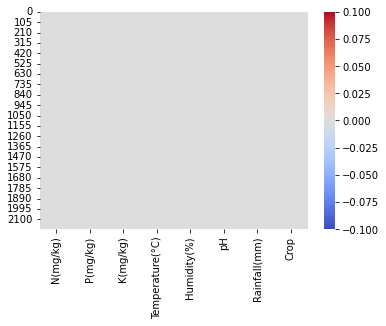

In [17]:
sns.heatmap(df_crop.isnull(),cmap="coolwarm")
plt.show()

#### It is important to know if there is missing value in our data. With heatmap, if there is a missing value, the location and occurance will be shown by a single-line, and it will show us if they are sparsely located or if they are located as a big chunk. The map will shod us the tendency. Moreover, if more than 2 columns have correlation in missing value locations, such correlation will be visualized. 

In this crop data, we could see that there is no missing value.


Checking the Data distribution.
When analyzing effect on dependent variable(output) with respective to a single feature(input), we use distribution plots a lot. It is also readily available in seaborn package. This plot gives us a combination of pdf and histogram in a single figure.

In [18]:
# supress warning, to avoid warning being shown 
# Warnings are provided to warn the developer of situations that aren't necessarily exceptions. 
# Usually, a warning occurs when there is some obsolete of certain programming elements, such as keyword, function or class, etc.

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

<AxesSubplot:xlabel='pH', ylabel='Density'>

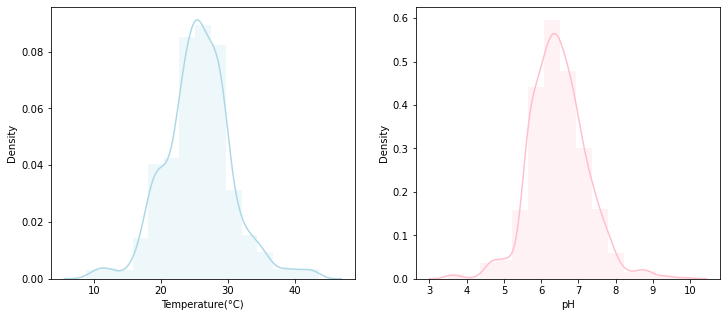

In [19]:
plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
sns.distplot(df_crop['Temperature(°C)'],color="lightblue",bins=15,hist_kws={'alpha':0.2})

plt.subplot(1, 2, 2)
sns.distplot(df_crop['pH'],color="pink",bins=15,hist_kws={'alpha':0.2})

seaborn.countplot() method is used to Show the counts of observations in each categorical bin using bars

<AxesSubplot:xlabel='count', ylabel='Crop'>

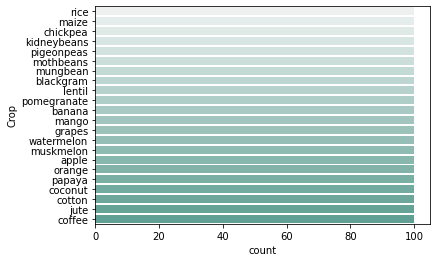

In [20]:
# showing the number of observation of each crops
# the similar count means that there are same occurance of data in each crop

sns.countplot(y='Crop',data=df_crop, palette= "light:#5A9")

Seaborn pairplot can be used to plot multiple pairwise bivariate distributions in a dataset. This shows the relationship for (n, 2) combination of variable in a DataFrame as a matrix of plots and the diagonal plots are the univariate plots.

In the code, 'hue' attributes is used for the visualization of a specific column, which in this case 'crop', as we want to see where this crops stands in each parameter.

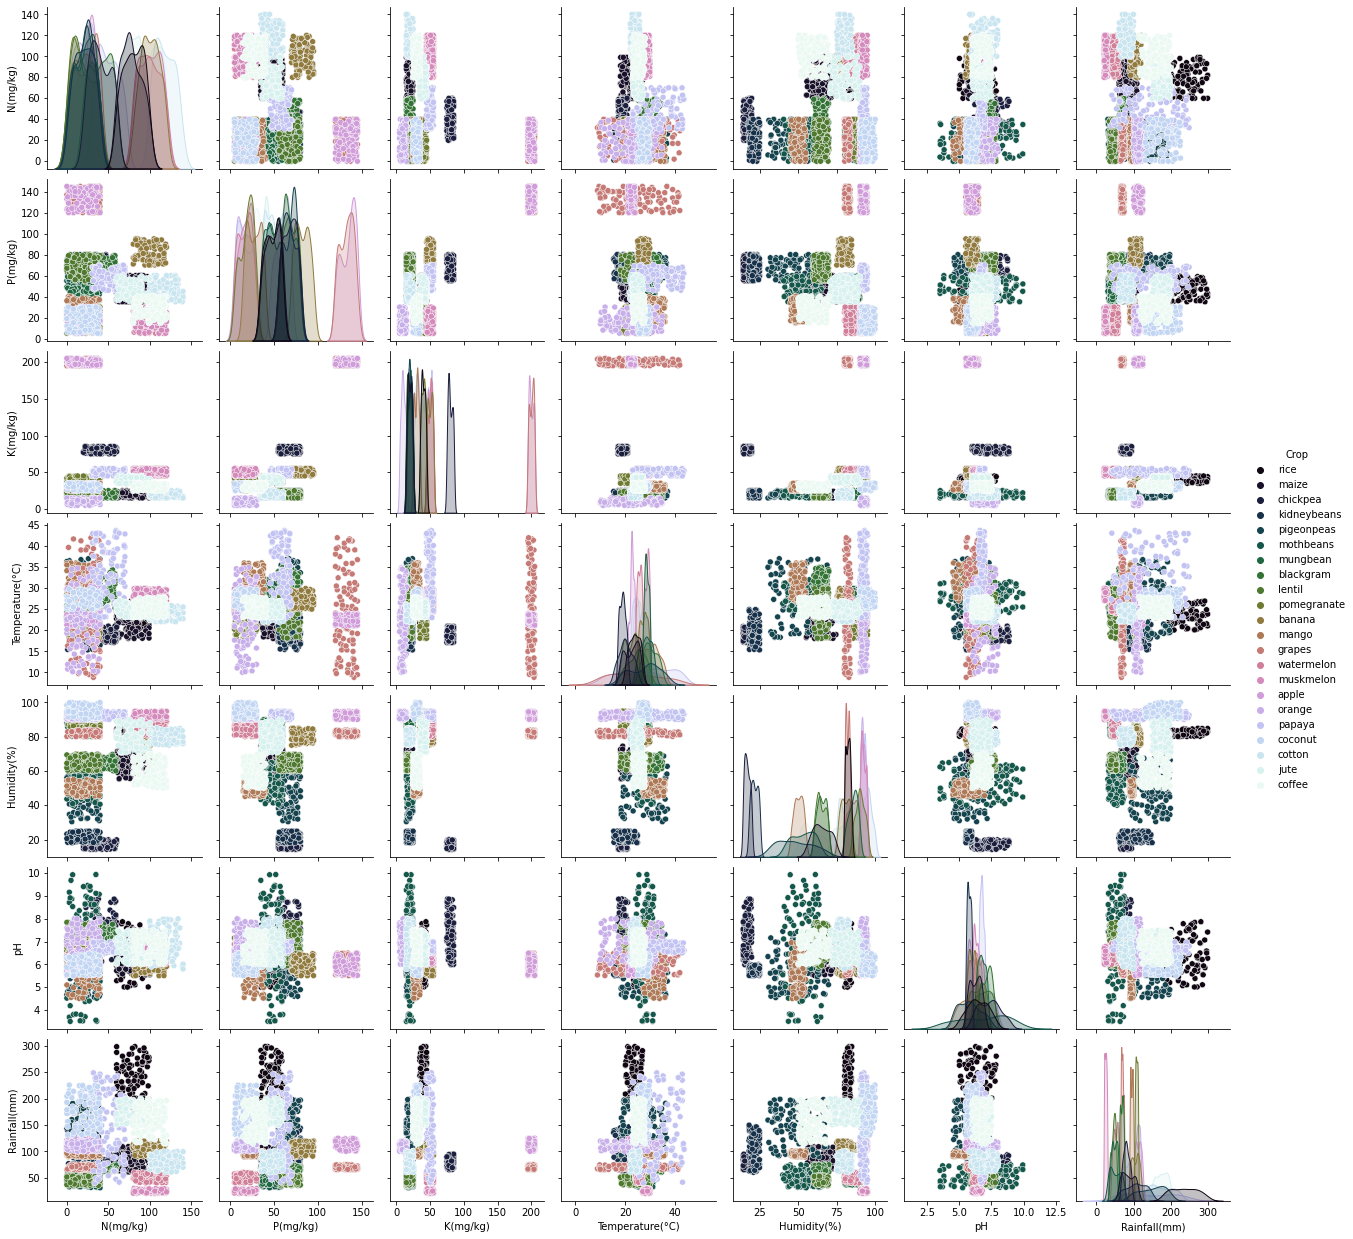

In [21]:
sns.pairplot(df_crop, hue = 'Crop', palette= 'cubehelix')

#### Let's analyse the plot above!

In [25]:
# average of Temperature
print(f"Mean of Temperature is: {round(df_crop['Temperature(°C)'].mean(),2)}°C")

# average of Humidity
print(f"Mean of Humidity is: {round(df_crop['Humidity(%)'].mean(),2)}%")

# average of Rainfall
print(f"Mean of Rainfall is: {round(df_crop['Rainfall(mm)'].mean(),2)}mm")




Mean of Temperature is: 25.62°C
Mean of Humidity is: 71.48%
Mean of Rainfall is: 103.46mm


We can divide the parameter into two main groups : SOIL and WEATHER.

1. Weather parameters (Temperature(C), Humidity(%), and Rainfall(mm))

From the temperature, we can see that certain crop only grow in the temperature zone > 20°C, following the rainfall that gives higher humidity. We can see the tropical crops like coffee, cotton, coconut, papaya.

Temperatures in tropical wet-dry climate regions are high throughout the year but show a greater range than wet equatorial (Af) and Am climates (19–20 °C in winter and 24–27 °C [75–81 °F] in summer).



#The Köppen climate classification defines a climate as "temperate" when the mean temperature is above −3 °C  but below 18 °C  in the coldest month. However, other climate classifications set the minimum at 0 °C (32.0 °F).

NEXT THING TO DO!

Seaborn’s jointplot displays a relationship between 2 variables (bivariate) as well as 1D profiles (univariate) in the margins. 

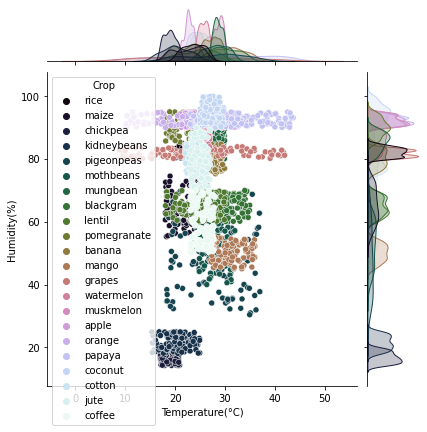

In [26]:
# we want to see the relationshio between Temparature and Humidity, relative to the crops

sns.jointplot(data=df_crop,x='Temperature(°C)', y='Humidity(%)', hue='Crop', palette= 'cubehelix')


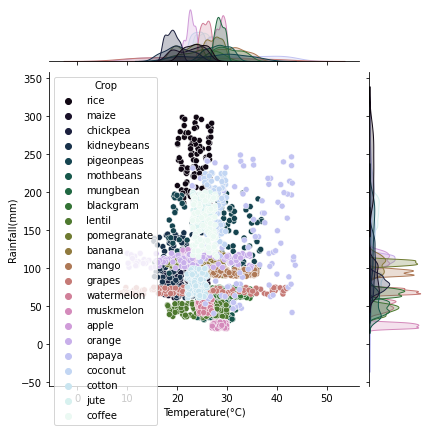

In [27]:
# we want to see the relationshio between Temperature and Rainfall, relative to the crops
sns.jointplot(data=df_crop,x='Temperature(°C)', y='Rainfall(mm)',  hue='Crop', palette= 'cubehelix')

Plot shows that crops like Rice and Corn grow in area with high rainfall (>200mm) and temperature between 20-30 degree C. While some tropical fruits like papaya needs some high temperature >30 with rainfall between 100-250mm.

During rainy season, average rainfall is high (average 120 mm) and temperature is mildly chill (less than 30'C).

During dry season, typically December to March is typically the dry season. Average daily maximum temperatures range between 25 and 34 °C in the Southern parts.

Let see the where the crops that can grow in dry season (rainfall <120mm and temperature >30), stands in the parameter of humidity.

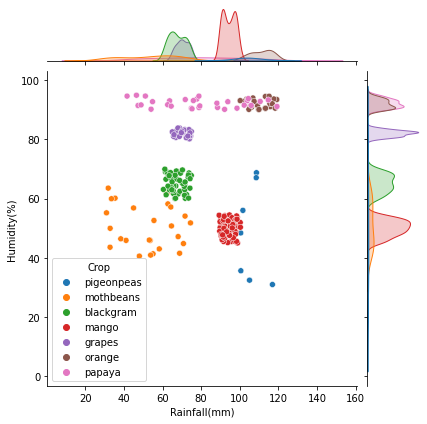

In [28]:
sns.jointplot(data=df_crop[(df_crop['Temperature(°C)']>30) & (df_crop['Rainfall(mm)']<120)], 
              x="Rainfall(mm)",y="Humidity(%)",hue="Crop")

Many tropical fruits like Mango and Papaya really need humidity above 50%. Black gram is one of tropical crops that really requires hot & humid climate.

2. Now we look the soil parameters (NPK content and pH)

Drought and over rainfall negative effects were decreased by increasing N- doses with combinations of potassium, phosphorous and magnesium from 13 to 32%



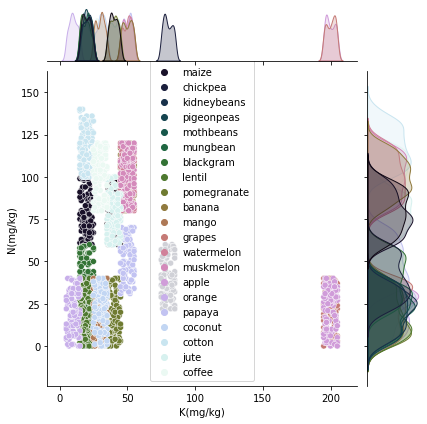

In [29]:
# Let see if how rasion of N and K affect the placement of crops

sns.jointplot(data = df_crop, x='K(mg/kg)',y='N(mg/kg)', hue='Crop', palette = 'cubehelix')
              

The study concludes that soil moisture has to be available 
in order for some select soil nutrients to be released for plant uptake.

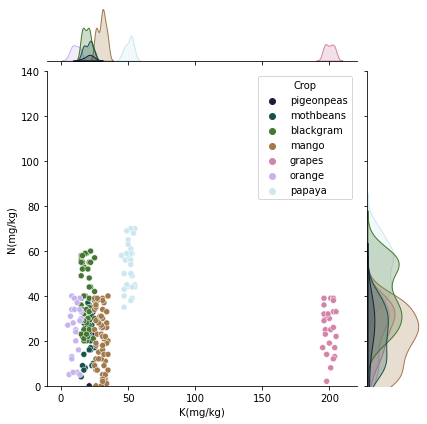

In [30]:
#Let see how N and K under the dry season condition
plot = sns.jointplot(data=df_crop[(df_crop['Temperature(°C)']>30) & (df_crop['Rainfall(mm)']<120)], 
              x='K(mg/kg)',y='N(mg/kg)',hue="Crop",palette = 'cubehelix' )
plot.ax_marg_y.set_ylim(0, 140)

plt.show()

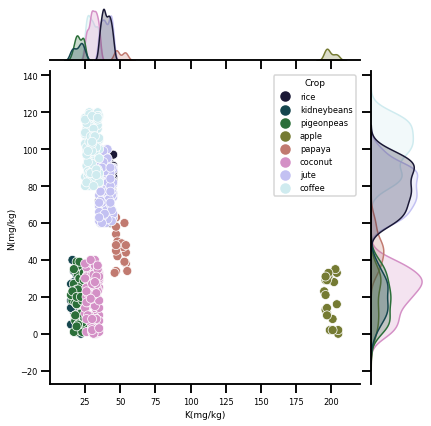

In [221]:
#Let see how N and K under the raining season condition
sns.jointplot(data=df_crop[(df_crop['Temperature(°C)']<30) & (df_crop['Rainfall(mm)']>120)], 
              x='K(mg/kg)',y='N(mg/kg)',hue="Crop", palette = 'cubehelix')

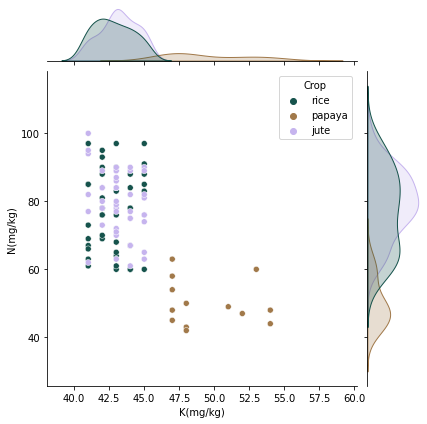

In [31]:
#Let see how N and K (that higher than 40) under the raining season condition
sns.jointplot(data=df_crop[(df_crop['Temperature(°C)']<30)&(df_crop['Rainfall(mm)']>120)&(df_crop['N(mg/kg)']>40)
                           &(df_crop['K(mg/kg)']>40)], 
              x='K(mg/kg)',y='N(mg/kg)',hue="Crop", palette = 'cubehelix')

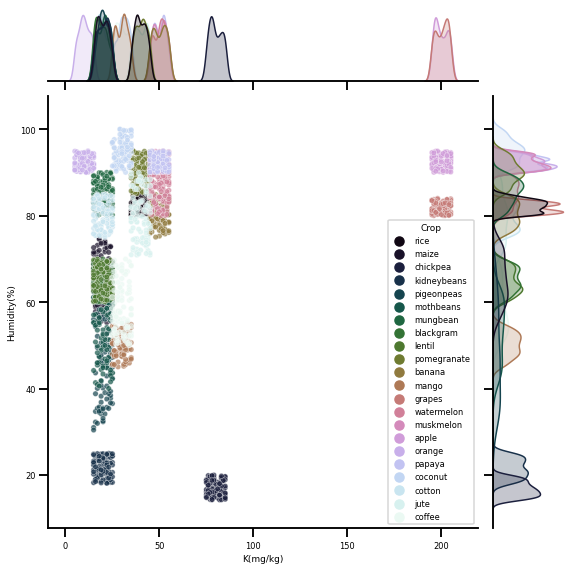

In [224]:
sns.jointplot(data=df_crop, x="K(mg/kg)",y="Humidity(%)",hue='Crop',size=8,s=30,alpha=0.7, palette='cubehelix')

Let see the Phosporus level during raining season (>120mm) and dry season (<120mm)

We are using 'seaborn boxplot'

A box plot (or box-and-whisker plot) shows the distribution of quantitative data in a way that facilitates comparisons between variables or across levels of a categorical variable. The box shows the quartiles of the dataset while the whiskers extend to show the rest of the distribution, except for points that are determined to be “outliers” using a method that is a function of the inter-quartile range.


<AxesSubplot:xlabel='P(mg/kg)', ylabel='Crop'>

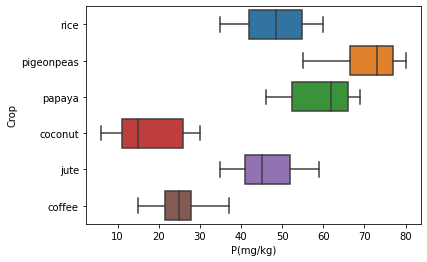

In [32]:
# During a really high rainfall level 
sns.boxplot(data=df_crop[df_crop['Rainfall(mm)']>190], y='Crop',x='P(mg/kg)')

<AxesSubplot:xlabel='P(mg/kg)', ylabel='Crop'>

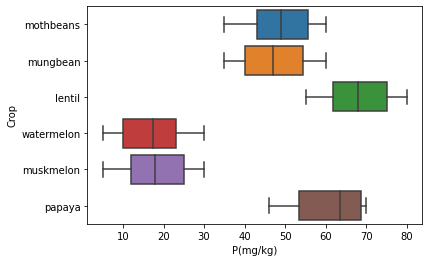

In [33]:
# During a really low rainfall in dry season (<120mm) 
sns.boxplot(data=df_crop[df_crop['Rainfall(mm)']<60], y='Crop',x='P(mg/kg)')

Let see with the lowest humidity.
We are using lineplot.

<AxesSubplot:xlabel='P(mg/kg)', ylabel='Rainfall(mm)'>

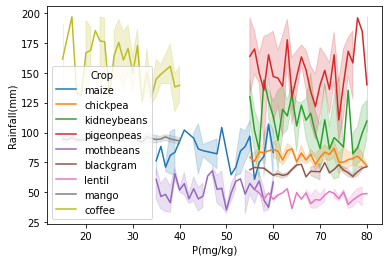

In [34]:
# Checking level of Phosporus of crops growing under low humidity (<65)
sns.lineplot(data=df_crop[df_crop['Humidity(%)']<65], y='Rainfall(mm)',x='P(mg/kg)', hue ='Crop')

<AxesSubplot:xlabel='K(mg/kg)', ylabel='Rainfall(mm)'>

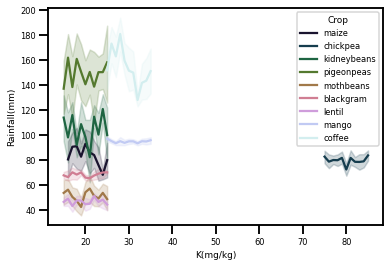

In [252]:
# Checking level of Potassium (K) of crops growing under low humidity (<65)
sns.lineplot(data=df_crop[df_crop['Humidity(%)']<65], 
             y='Rainfall(mm)',x='K(mg/kg)', hue='Crop', palette = 'cubehelix')

Plot above shows that When humidity is less than 65, almost same Potassium levels(approx 14 to 25) are required for 6 crops, which could be grown just based on the amount of rain expected over the next few weeks.

NEXT
We can see pH values are critical when it comes to soil. A stability between 6 and 7 is preffered.

<AxesSubplot:xlabel='pH', ylabel='Crop'>

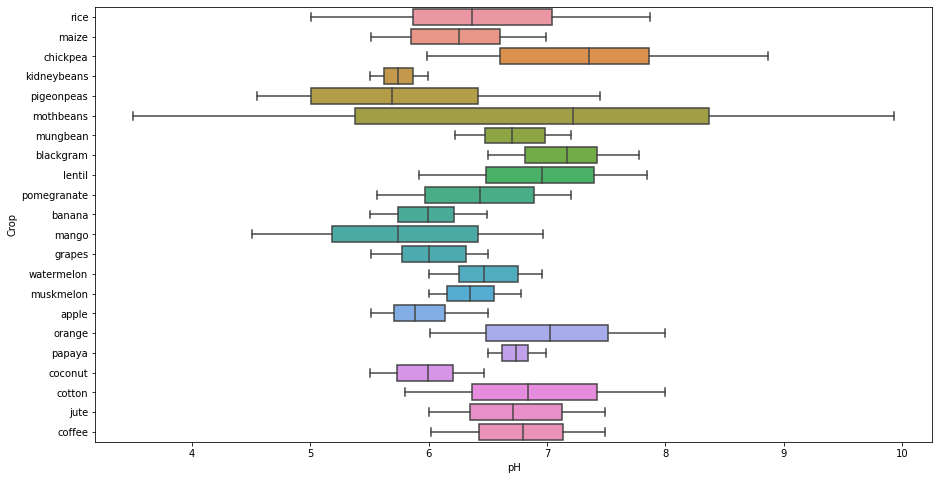

In [35]:
# Making a boxplot
plt.figure(figsize=(15,8))
sns.boxplot(data=df_crop, y='Crop',x='pH')

### Getting the DATA ready for MACHINE LEARNING - PreProcessing

### First thing to do is:

### Correlation heatmap

A correlation heatmap is a heatmap that shows a 2D correlation matrix between two discrete dimensions, using colored cells to represent data from usually a monochromatic scale. The values of the "first dimension" appear as the ROWS of the table while of the "second dimension" as a COLUMN


In [36]:
c=df_crop.Crop.astype('category')
targets = dict(enumerate(c.cat.categories))
df_crop['target']=c.cat.codes

y=df_crop.target
X=df_crop[['N(mg/kg)','P(mg/kg)','K(mg/kg)','Temperature(°C)','Humidity(%)','pH','Rainfall(mm)']]

<AxesSubplot:>

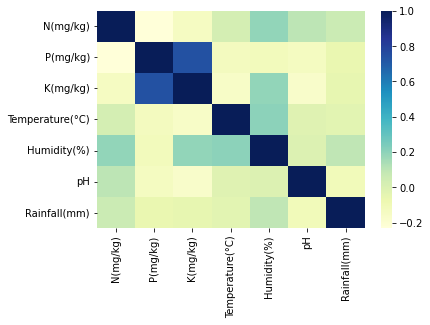

In [38]:
sns.heatmap(X.corr(),cmap="YlGnBu")

#### Interpretation of the correlation heatmap

Each square shows the correlation between the variables on each axis. Correlation ranges from -1 to +1. 

- Values CLOSER TO ZERO means there is no linear trend between the two variables.

- The CLOSE TO 1 the correlation is the more positively correlated they are; that is as one increases so does the other and the closer to 1 the stronger this relationship is. 

- A correlation CLOSER TO -1 is similar, but instead of both increasing one variable will decrease as the other increases. 

The diagonals are all dark Blue/ Navy color because those squares are correlating each variable to itself (so it's a perfect correlation). For the rest the larger the number and darker the color the HIGHER THE CORRELATION between the two variables. The plot is also symmetrical about the diagonal since the same two variables are being paired together in those squares.

Together with nitrogen, P and K form the Big Three of crop nutrients.
P plays a crucial role in plant processes like photosynthesis, respiration, and energy storage and transfer. K benefits include increased root growth, improved drought tolerance, and enhanced photosynthesis.
 
From the heatmap we could see that P and K has positive correlation

### KNN

For this set of data we will be implementing KNN by using scikit-learn KneighborsClassifer.

### KNN Algorithm

In KNN, K represent the number of nearest neighbors; k is an integer value specified by the user. This classifier implements learning based on the k nearest neighbors.

The number of neighbors is the core deciding factor.

K is generally an odd number if the number of classes is 2. 
When K=1, then the algorithm is known as the nearest neighbor algorithm.

Suppose P1 is the point, for which label needs to predict. First, you find the one closest point to P1 and then the label of the nearest point assigned to P1.
Suppose P1 is the point, for which label needs to predict. First, you find the k closest point to P1 and then classify points by majority vote of its k neighbors. Each object votes for their class and the class with the most votes is taken as the prediction. For finding closest similar points, you find the distance between points using distance measures such as Euclidean distance, Hamming distance, Manhattan distance and Minkowski distance

KNN is categorized into LAZY Learning!
Lazy Learning means there is no need for learning or training of the model and all of the data points used at the time of prediction. Lazy learners wait until the last minute before classifying any data point. Lazy learner stores merely the training dataset and waits until classification needs to perform. 

Our task here is to build a KNN model which classifies the crop based on the weather and soil content data.

### Let's build KNN classifier model.

We will need to import several dataset for the modelling.
- train_test_split --> arrays or matrices into random train and test subsets.
- MinMaxScaller preserves the shape of the original distribution. 
- KNeighborsClassifier can be used for regression as well, KNN does not make any assumptions on the data distribution, hence it is non-parametric. It keeps all the training data to make future predictions by computing the similarity between an input sample and each training instance.


In [39]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=1)

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)

# we must apply the scaling to the test set as well that we are computing for the training set
X_test_scaled = scaler.transform(X_test)

Below is the calculation of the KNN score.

The score() method allows us to calculate the mean accuracy for the test data. In this case we obtained around 97,8% of accuracy. This show how accurately the classifier or model can predict the type of crops.

In [40]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train_scaled, y_train)
knn.score(X_test_scaled, y_test)

0.9781818181818182

### Confusion matrix 

Confusion Matrix computed to evaluate the accuracy of a classification.

Confusion matrix is a matrix that allows you to visualize the performance of the classification machine learning models. With this visualization, you can get a better idea of how your machine learning model is performing.

<AxesSubplot:>

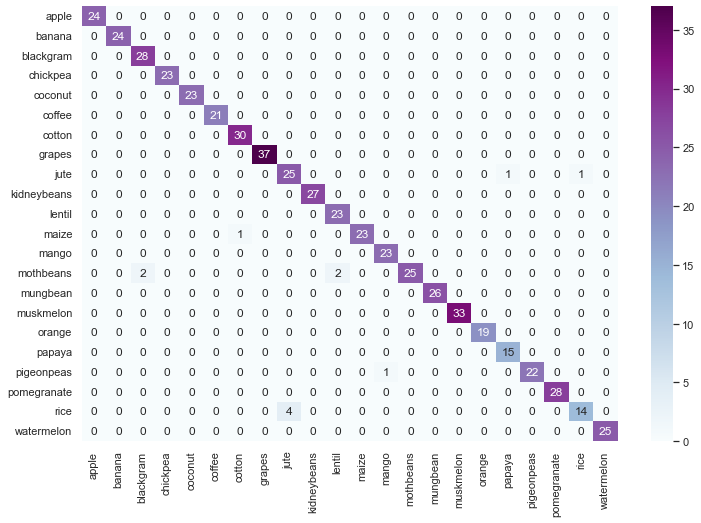

In [48]:
from sklearn.metrics import confusion_matrix
mat=confusion_matrix(y_test,knn.predict(X_test_scaled))
df_cm = pd.DataFrame(mat, list(targets.values()), list(targets.values()))
sns.set(font_scale=1.0) # for label size
plt.figure(figsize = (12,8))
sns.heatmap(df_cm, annot=True, annot_kws={"size": 12},cmap="BuPu")

The diagonal elements represent the number of points for which the predicted label is equal to the true label, while off-diagonal elements are those that are mislabeled by the classifier. 

The higher the diagonal values of the confusion matrix the better, indicating many correct predictions.

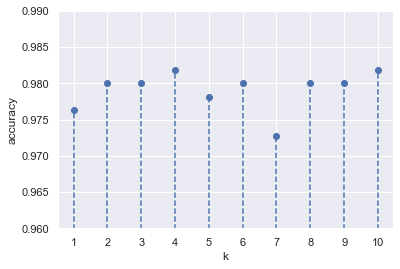

In [260]:
k_range = range(1,11)
scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train_scaled, y_train)
    scores.append(knn.score(X_test_scaled, y_test))

plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.vlines(k_range,0, scores, linestyle="dashed")
plt.ylim(0.96,0.99)
plt.xticks([i for i in range(1,11)]);


In [261]:
from sklearn.svm import SVC

svc_linear = SVC(kernel = 'linear').fit(X_train_scaled, y_train)
print("Linear Kernel Accuracy: ",svc_linear.score(X_test_scaled,y_test))

svc_poly = SVC(kernel = 'rbf').fit(X_train_scaled, y_train)
print("Rbf Kernel Accuracy: ", svc_poly.score(X_test_scaled,y_test))

svc_poly = SVC(kernel = 'poly').fit(X_train_scaled, y_train)
print("Poly Kernel Accuracy: ", svc_poly.score(X_test_scaled,y_test))

Linear Kernel Accuracy:  0.9745454545454545
Rbf Kernel Accuracy:  0.9872727272727273
Poly Kernel Accuracy:  0.9890909090909091


In [262]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

parameters = {'C': np.logspace(-3, 2, 6).tolist(), 'gamma': np.logspace(-3, 2, 6).tolist()}
# 'degree': np.arange(0,5,1).tolist(), 'kernel':['linear','rbf','poly']

model = GridSearchCV(estimator = SVC(kernel="linear"), param_grid=parameters, n_jobs=-1, cv=4)
model.fit(X_train, y_train)

GridSearchCV(cv=4, estimator=SVC(kernel='linear'), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0],
                         'gamma': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]})

In [263]:
print(model.best_score_ )
print(model.best_params_ )

0.9866710547967747
{'C': 1.0, 'gamma': 0.001}


In [264]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(random_state=42).fit(X_train, y_train)
clf.score(X_test,y_test)

0.9872727272727273

### Calculating Feature Importance

As explained in an article of Jason Brownlee entitled "Data Preparation. 
Feature importance refers to techniques that assign a score to input features based on how useful or how important they are at predicting a target variable.
The score simply represent the 'importance' of each feature or in this case the parameter.

The score are useful and can be used in a range of situations in a predictive modeling problem, such as:

- Better understanding the data.
- Better understanding a model.
- Reducing the number of input features.



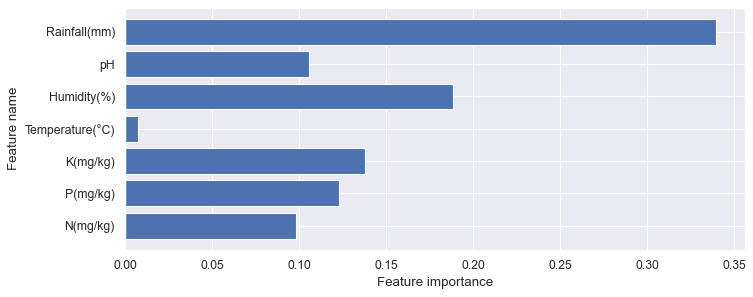

In [265]:
plt.figure(figsize=(10,4), dpi=80)
c_features = len(X_train.columns)
plt.barh(range(c_features), clf.feature_importances_)
plt.xlabel("Feature importance")
plt.ylabel("Feature name")
plt.yticks(np.arange(c_features), X_train.columns)
plt.show()


We observe that, the features that found most important is the Rainfall, followed by the humidity.

In [266]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=4,n_estimators=100,random_state=42).fit(X_train, y_train)

print('RF Accuracy on training set: {:.2f}'.format(clf.score(X_train, y_train)))
print('RF Accuracy on test set: {:.2f}'.format(clf.score(X_test, y_test)))

RF Accuracy on training set: 0.97
RF Accuracy on test set: 0.97
